In [4]:
import pandas as pd
df=pd.read_excel('./data/cookie company.xlsx',sheet_name='data')
df

,Country,Product,Units Sold,Revenue,Cost,Date,profit
0,India,Chocolate Chip,1725,8625,3450.0,2019-11-01,5175.0
1,India,Chocolate Chip,2152,10760,4304.0,2019-12-01,6456.0
2,India,Chocolate Chip,2349,11745,4698.0,2019-09-01,7047.0
3,India,Chocolate Chip,1228,6140,2456.0,2019-10-01,3684.0
4,India,Chocolate Chip,1389,6945,2778.0,2019-10-01,4167.0
...,...,...,...,...,...,...,...
695,United States,White Chocolate Macadamia Nut,1596,9576,4389.0,2020-09-01,5187.0
696,United States,White Chocolate Macadamia Nut,986,5916,2711.5,2020-10-01,3204.5
697,United States,White Chocolate Macadamia Nut,606,3636,1666.5,2020-04-01,1969.5
698,United States,White Chocolate Macadamia Nut,2460,14760,6765.0,2020-07-01,7995.0


In [6]:
df.shape

(700, 7)

In [10]:
print(df.Revenue.min())
print(df.Revenue.max())
print(round(df.Revenue.mean(),2))
print(df["Units Sold"].mean())

200
23988
6700.46
1608.32


In [11]:
df.Product.value_counts()

Product
Chocolate Chip                   202
Sugar                            109
White Chocolate Macadamia Nut    109
Oatmeal Raisin                    94
Fortune Cookie                    93
Snickerdoodle                     93
Name: count, dtype: int64

<Axes: ylabel='proportion'>

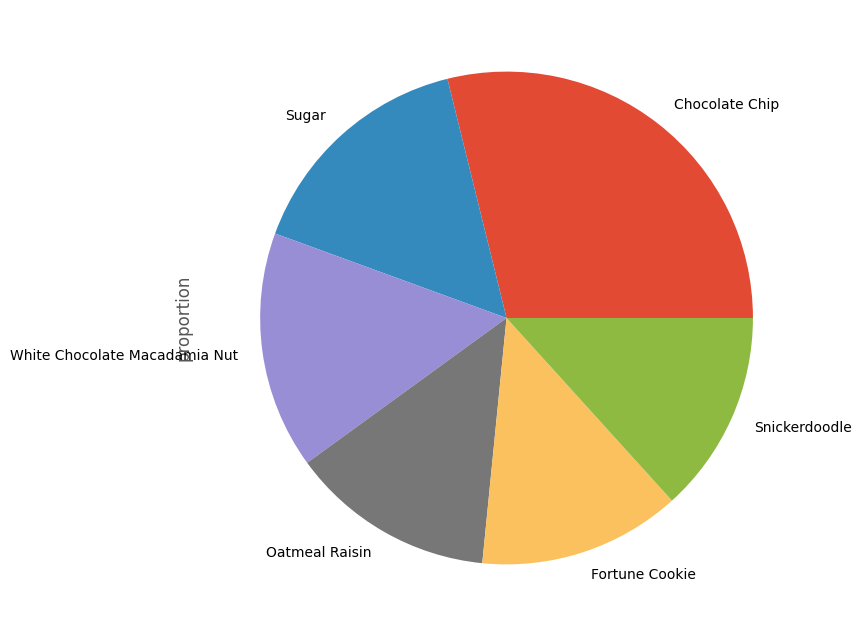

In [12]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

df.Product.value_counts(normalize=True).plot.pie()

In [16]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' 

<Axes: xlabel='Cost', ylabel='profit'>

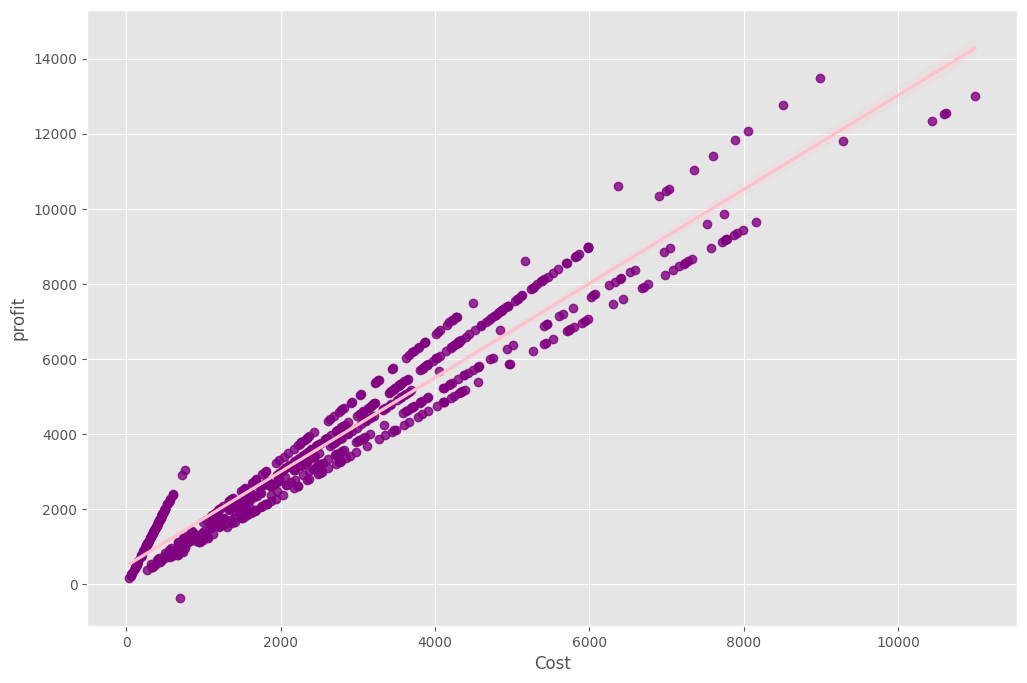

In [18]:
import seaborn as sns

sns.regplot(x='Cost', y="profit", data=df, scatter_kws={"color":"purple"}, line_kws={"color":"pink"})


<Axes: xlabel='Units Sold', ylabel='Revenue'>

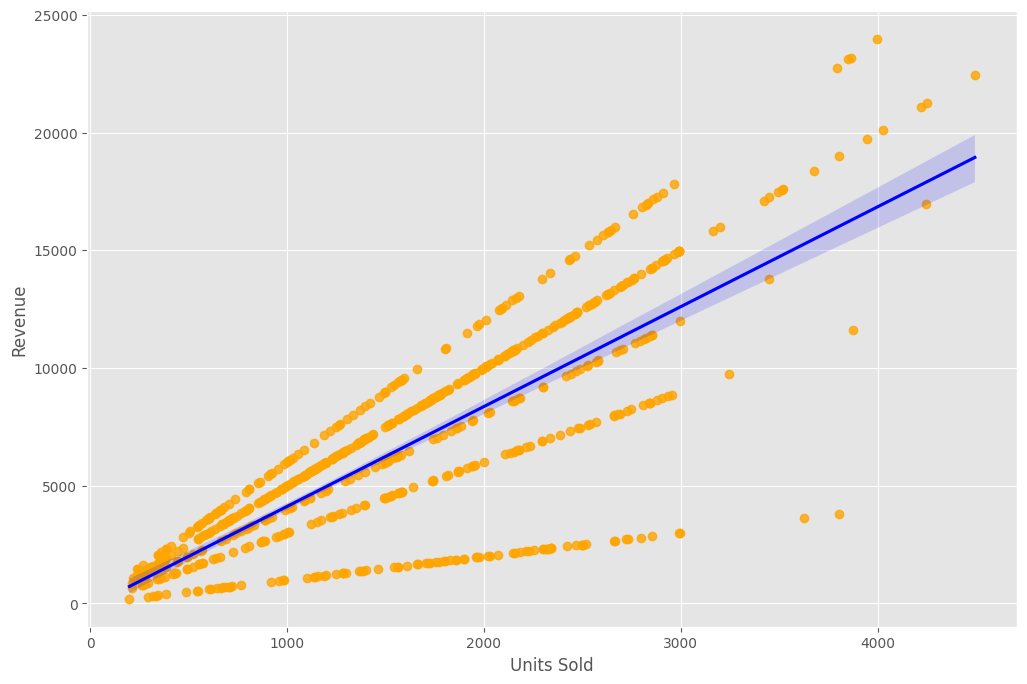

In [ ]:


sns.regplot(y="Revenue", x="Units Sold", data=df, scatter_kws={"color":"orange"}, line_kws={"color":"blue"})

<Axes: xlabel='Cost', ylabel='profit'>

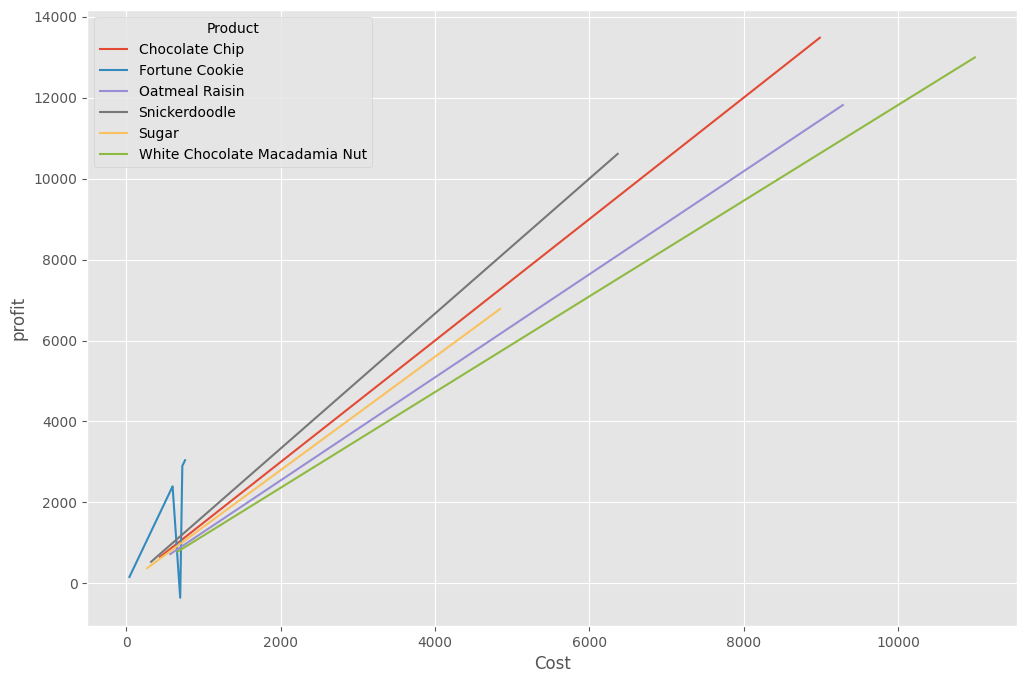

In [19]:
sns.lineplot(x='Cost', y='profit', hue='Product', data=df, color='red')

<Axes: xlabel='Cost', ylabel='profit'>

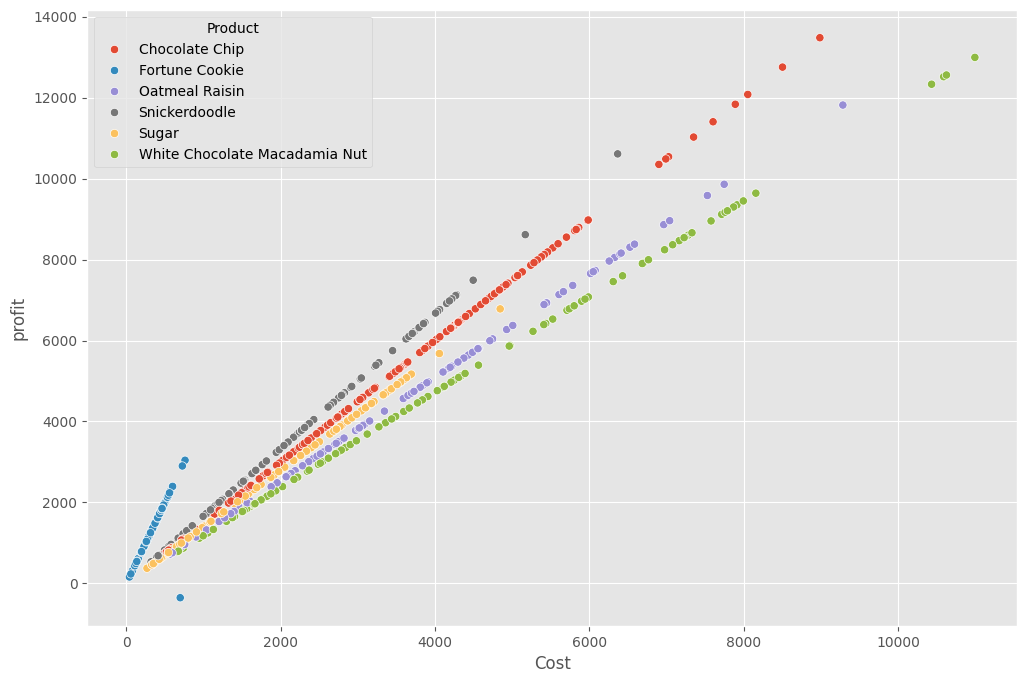

In [20]:
sns.scatterplot(x='Cost', y='profit', hue='Product', data=df, color='red')

In [15]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

            Units Sold   Revenue      Cost    profit
Units Sold    1.000000  0.796298  0.742342  0.829371
Revenue       0.796298  1.000000  0.991913  0.995114
Cost          0.742342  0.991913  1.000000  0.974536
profit        0.829371  0.995114  0.974536  1.000000
